In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import visualization
colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

In [9]:
tf.__version__

'2.20.0'

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [11]:
# Always flatten to enter a danse layer (vector)

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# batch_size = number of samples that will be propagated through the network, looking for gradient on that batch
hist = model.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.8771 - loss: 2.1467
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9318 - loss: 0.4194
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.9473 - loss: 0.2575
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.9547 - loss: 0.1946
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.9596 - loss: 0.1649


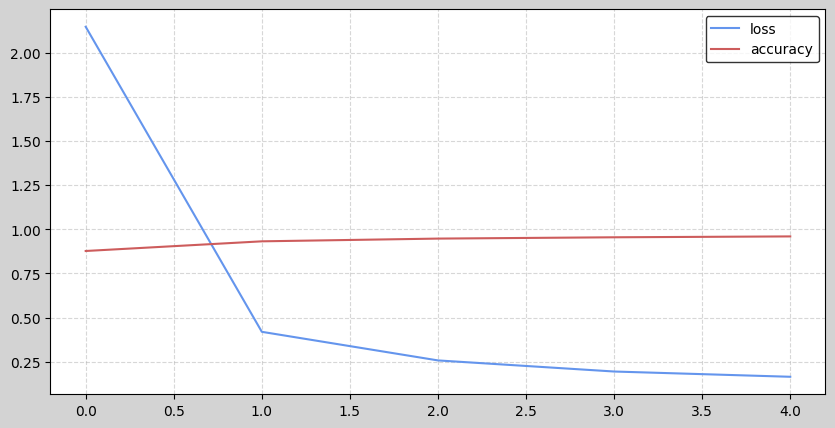

In [14]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='loss', color=colors[0])
plt.plot(hist.history['accuracy'], label='accuracy', color=colors[1]) 
plt.legend()
plt.show() 